Data Analysis by Year

In [ ]:
import pandas as pd

# Load your dataset
df_osd = pd.read_csv('/content/online_sales_dataset.csv')

# Ensure 'InvoiceDate' is in datetime format
df_osd['InvoiceDate'] = pd.to_datetime(df_osd['InvoiceDate'])


In [ ]:
# Create a new column for the year
df_osd['Year'] = df_osd['InvoiceDate'].dt.year

# Create a dictionary to store dataframes for each year
data_by_year = {year: df_osd[df_osd['Year'] == year] for year in df_osd['Year'].unique()}

In [ ]:
results_by_year = {}

for year, data in data_by_year.items():

    # Calculate total sales
    data['TotalSales'] = data['UnitPrice'] * data['Quantity'] * (1 - data['Discount'])

    # Group by 'Description' and aggregate necessary columns
    grouped = data.groupby('Description').agg({
        'TotalSales': 'sum',
        'ShippingCost': 'sum'
    }).reset_index()

    # Calculate profit for each product
    grouped['Profit'] = grouped['TotalSales'] - grouped['ShippingCost']

    # Store results
    results_by_year[year] = grouped

# Display results for a specific year, e.g., 2020
print(results_by_year[2020])


       Description     TotalSales  ShippingCost         Profit
0         Backpack  728783.172292      13464.30  715318.872292
1         Blue Pen  667979.039751      13644.63  654334.409751
2        Desk Lamp  628705.523468      12887.66  615817.863468
3       Headphones  724181.551540      13711.63  710469.921540
4         Notebook  663216.969098      12853.14  650363.829098
5     Office Chair  706170.899439      13596.13  692574.769439
6          T-shirt  686381.180392      13407.70  672973.480392
7        USB Cable  740398.414438      13583.50  726814.914438
8       Wall Clock  707255.624365      13728.90  693526.724365
9        White Mug  704912.203458      12559.22  692352.983458
10  Wireless Mouse  663781.344229      13077.15  650704.194229


<ipython-input-37-983647596d04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSales'] = data['UnitPrice'] * data['Quantity'] * (1 - data['Discount'])
<ipython-input-37-983647596d04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSales'] = data['UnitPrice'] * data['Quantity'] * (1 - data['Discount'])
<ipython-input-37-983647596d04>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
for year, data in data_by_year.items():
    # Example: Sales Trends
    monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()
    print(f"Monthly Sales for {year}:")
    print(monthly_sales)

    # Example: Top Performing Products
    top_products = data.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
    print(f"Top Products for {year}:")
    print(top_products)


Monthly Sales for 2020:
InvoiceDate
2020-01-31    630703.010252
2020-02-29    608863.278708
2020-03-31    648736.022424
2020-04-30    660908.151737
2020-05-31    644803.553348
2020-06-30    613828.830403
2020-07-31    624132.099599
2020-08-31    642348.786708
2020-09-30    642788.463084
2020-10-31    640867.527632
2020-11-30    632877.939529
2020-12-31    630908.259047
Freq: ME, Name: TotalSales, dtype: float64
Top Products for 2020:
Description
USB Cable         740398.414438
Backpack          728783.172292
Headphones        724181.551540
Wall Clock        707255.624365
Office Chair      706170.899439
White Mug         704912.203458
T-shirt           686381.180392
Blue Pen          667979.039751
Wireless Mouse    663781.344229
Notebook          663216.969098
Name: TotalSales, dtype: float64
Monthly Sales for 2021:
InvoiceDate
2021-01-31    676682.412194
2021-02-28    587354.937763
2021-03-31    652888.838266
2021-04-30    637826.312613
2021-05-31    656681.562110
2021-06-30    639627.

<ipython-input-39-b308974465a0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()
<ipython-input-39-b308974465a0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()
<ipython-input-39-b308974465a0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()
<ipython-input-39-b308974465a0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()
<ipython-input-39-b308974465a0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resampl

<ipython-input-45-580a268579e8>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


Monthly Sales for 2020:
InvoiceDate
2020-01-31    630703.010252
2020-02-29    608863.278708
2020-03-31    648736.022424
2020-04-30    660908.151737
2020-05-31    644803.553348
2020-06-30    613828.830403
2020-07-31    624132.099599
2020-08-31    642348.786708
2020-09-30    642788.463084
2020-10-31    640867.527632
2020-11-30    632877.939529
2020-12-31    630908.259047
Freq: ME, Name: TotalSales, dtype: float64


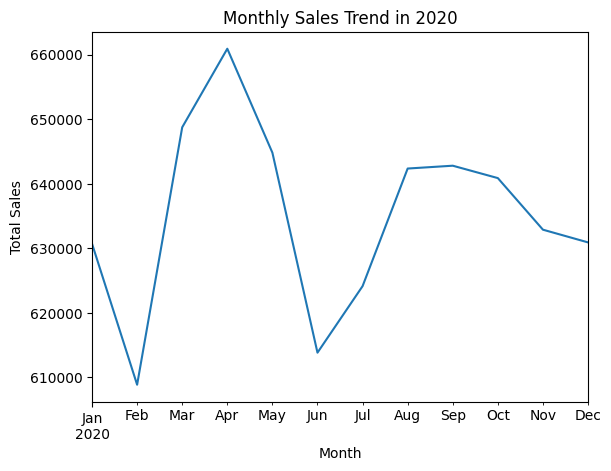

<ipython-input-45-580a268579e8>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


Monthly Sales for 2021:
InvoiceDate
2021-01-31    676682.412194
2021-02-28    587354.937763
2021-03-31    652888.838266
2021-04-30    637826.312613
2021-05-31    656681.562110
2021-06-30    639627.420381
2021-07-31    627929.013168
2021-08-31    627341.413019
2021-09-30    673786.301887
2021-10-31    641321.017677
2021-11-30    623568.926868
2021-12-31    664864.310941
Freq: ME, Name: TotalSales, dtype: float64


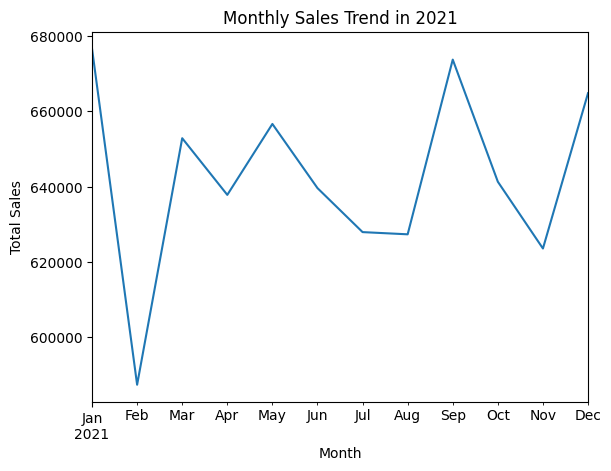

<ipython-input-45-580a268579e8>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


Monthly Sales for 2022:
InvoiceDate
2022-01-31    661525.894881
2022-02-28    579115.735305
2022-03-31    657063.986980
2022-04-30    636828.675653
2022-05-31    615659.138483
2022-06-30    658976.651418
2022-07-31    678116.692371
2022-08-31    664836.191795
2022-09-30    572748.672338
2022-10-31    676098.144131
2022-11-30    633540.484854
2022-12-31    630328.263008
Freq: ME, Name: TotalSales, dtype: float64


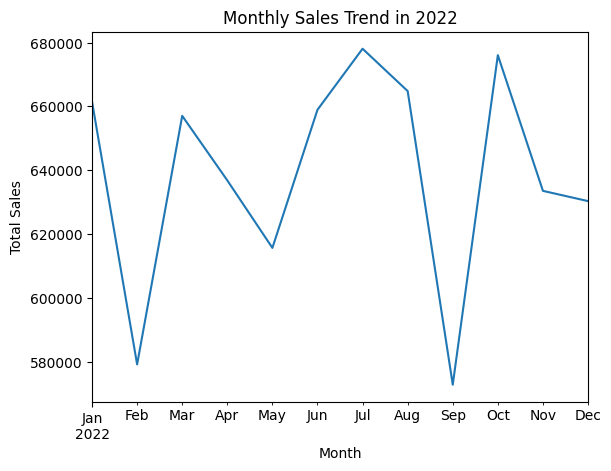

<ipython-input-45-580a268579e8>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


Monthly Sales for 2023:
InvoiceDate
2023-01-31    641480.058695
2023-02-28    570087.589139
2023-03-31    645781.361819
2023-04-30    619068.432268
2023-05-31    629242.769450
2023-06-30    595983.038148
2023-07-31    621461.016976
2023-08-31    620318.568726
2023-09-30    630743.372961
2023-10-31    667173.432112
2023-11-30    656938.516435
2023-12-31    674068.049064
Freq: ME, Name: TotalSales, dtype: float64


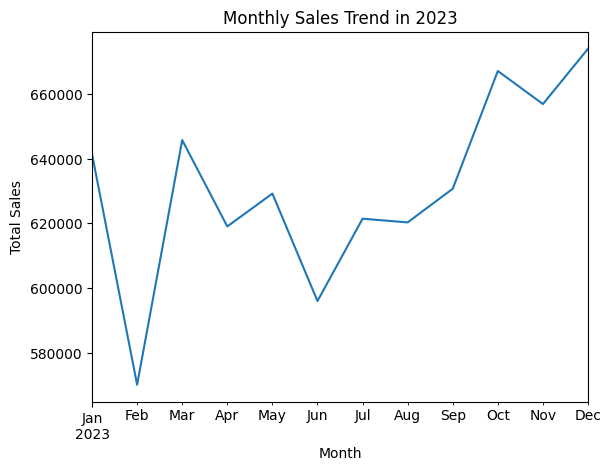

<ipython-input-45-580a268579e8>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


Monthly Sales for 2024:
InvoiceDate
2024-01-31    627778.896520
2024-02-29    602332.221024
2024-03-31    640498.867903
2024-04-30    657351.801108
2024-05-31    658197.521221
2024-06-30    607222.831667
2024-07-31    671598.312574
2024-08-31    677339.845548
2024-09-30    669969.861332
2024-10-31    660350.737755
2024-11-30    644207.316479
2024-12-31    640246.045483
Freq: ME, Name: TotalSales, dtype: float64


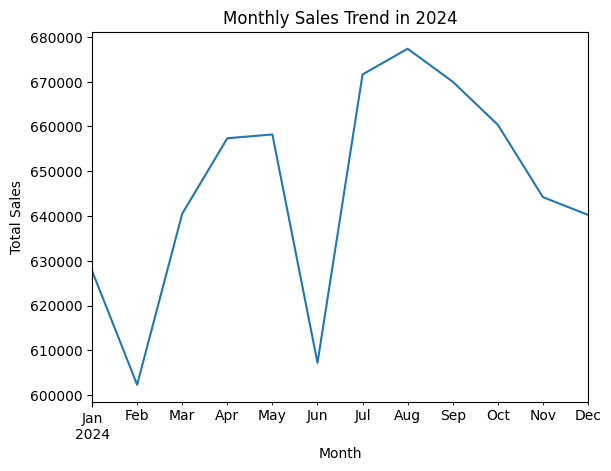

<ipython-input-45-580a268579e8>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()


Monthly Sales for 2025:
InvoiceDate
2025-01-31    669243.414550
2025-02-28    587022.922561
2025-03-31    659199.288578
2025-04-30    635702.838458
2025-05-31    651934.977776
2025-06-30    597415.753604
2025-07-31    635611.162991
2025-08-31    661838.894834
2025-09-30     87494.000717
Freq: ME, Name: TotalSales, dtype: float64


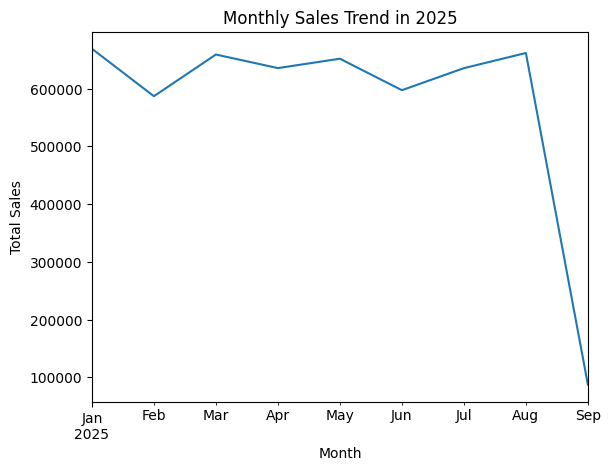

In [ ]:
import pandas as pd
# Import the necessary library for plotting
import matplotlib.pyplot as plt

#Sales_Trend
for year, data in data_by_year.items():
    monthly_sales = data.resample('M', on='InvoiceDate')['TotalSales'].sum()
    print(f"Monthly Sales for {year}:")
    print(monthly_sales)

    # Plotting sales trends
    monthly_sales.plot(title=f'Monthly Sales Trend in {year}')
    plt.xlabel('Month') # Now plt is defined and can be used
    plt.ylabel('Total Sales')
    plt.show()

In [ ]:
#Customer segmentation
for year, data in data_by_year.items():
    customer_sales = data.groupby('CustomerID')['TotalSales'].sum()
    print(f"Customer Sales Segmentation for {year}:")
    print(customer_sales.describe())

    # Example segmentation: High-value customers
    high_value_customers = customer_sales[customer_sales > customer_sales.mean() + customer_sales.std()].head(10)
    print(f"High-Value Customers in {year}:")
    print(high_value_customers)


Customer Sales Segmentation for 2020:
count    7588.000000
mean      982.219693
std       884.341341
min         0.984400
25%       272.556000
50%       730.587200
75%      1472.666400
max      5630.134800
Name: TotalSales, dtype: float64
High-Value Customers in 2020:
CustomerID
10090.0    3585.2400
10257.0    2135.3542
10278.0    2246.5296
10349.0    1923.7200
10434.0    3302.6598
10488.0    2529.2652
10577.0    1932.2632
10588.0    2526.3526
10627.0    1984.4265
10768.0    2599.0622
Name: TotalSales, dtype: float64
Customer Sales Segmentation for 2021:
count    7575.000000
mean      989.808510
std       892.880113
min         1.151400
25%       263.573750
50%       735.000000
75%      1465.069500
max      5947.059000
Name: TotalSales, dtype: float64
High-Value Customers in 2021:
CustomerID
10055.0    1954.3020
10069.0    2533.4998
10077.0    1967.2800
10120.0    1957.3892
10233.0    2784.3816
10353.0    2463.0900
10447.0    2472.3942
10458.0    2330.6184
10468.0    2279.8512
10548.0 

Sales by Category for 2020:
Category
Accessories    1.446663e+06
Apparel        1.569180e+06
Electronics    1.477336e+06
Furniture      1.490385e+06
Stationery     1.638201e+06
Name: TotalSales, dtype: float64


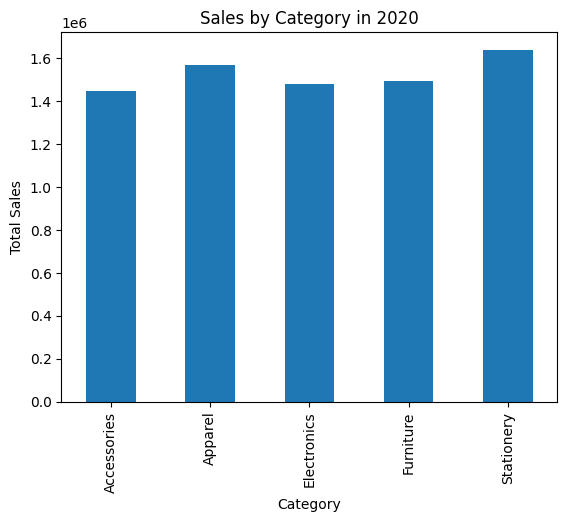

Sales by Category for 2021:
Category
Accessories    1.529344e+06
Apparel        1.494225e+06
Electronics    1.601860e+06
Furniture      1.516533e+06
Stationery     1.567910e+06
Name: TotalSales, dtype: float64


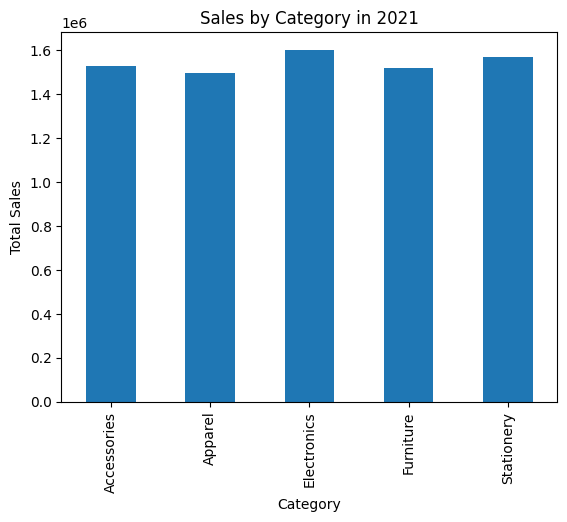

Sales by Category for 2022:
Category
Accessories    1.564113e+06
Apparel        1.535366e+06
Electronics    1.499277e+06
Furniture      1.579015e+06
Stationery     1.487068e+06
Name: TotalSales, dtype: float64


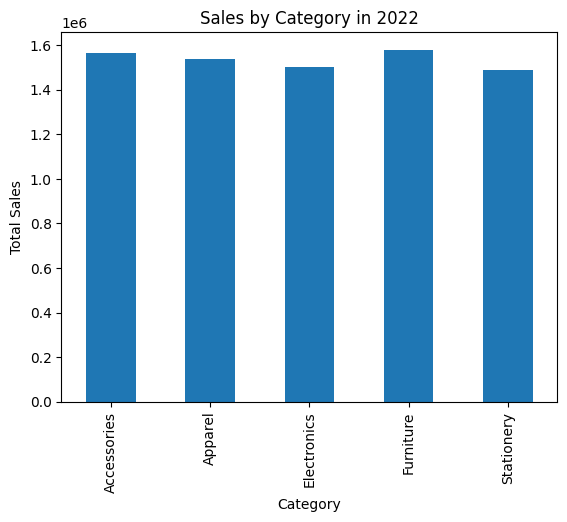

Sales by Category for 2023:
Category
Accessories    1.578576e+06
Apparel        1.481536e+06
Electronics    1.485050e+06
Furniture      1.530876e+06
Stationery     1.496308e+06
Name: TotalSales, dtype: float64


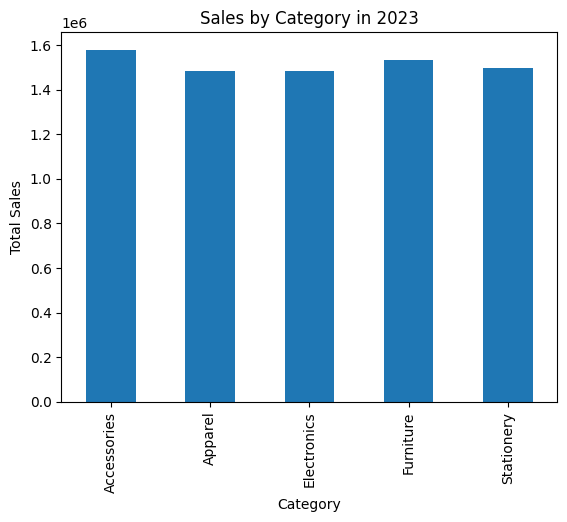

Sales by Category for 2024:
Category
Accessories    1.589311e+06
Apparel        1.562108e+06
Electronics    1.522008e+06
Furniture      1.577662e+06
Stationery     1.506006e+06
Name: TotalSales, dtype: float64


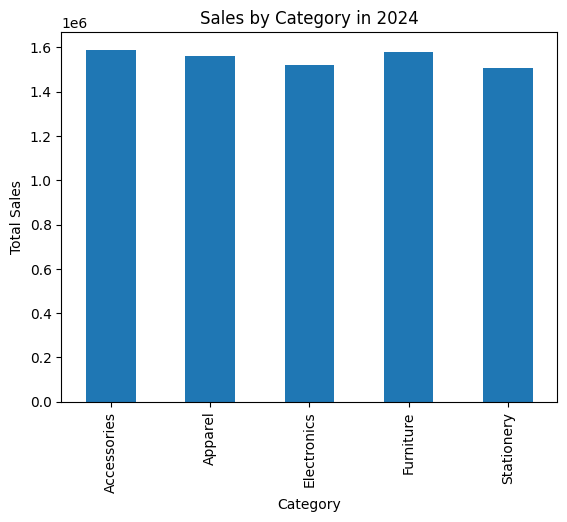

Sales by Category for 2025:
Category
Accessories    1.023401e+06
Apparel        1.041713e+06
Electronics    1.051186e+06
Furniture      1.106940e+06
Stationery     9.622240e+05
Name: TotalSales, dtype: float64


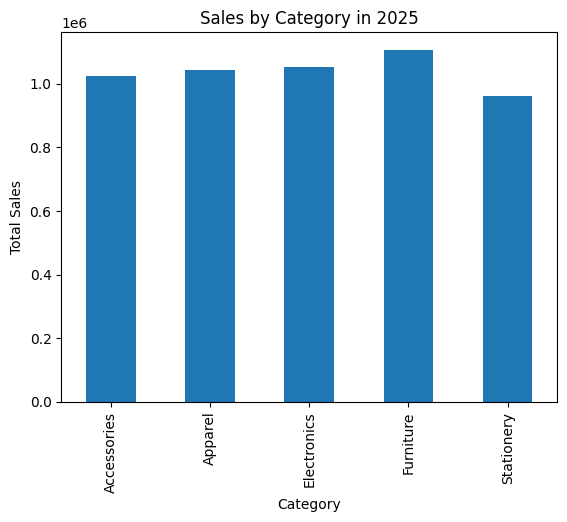

In [ ]:
#Product Performance by Category
for year, data in data_by_year.items():
    category_sales = data.groupby('Category')['TotalSales'].sum()
    print(f"Sales by Category for {year}:")
    print(category_sales)

    # Plotting category sales
    category_sales.plot(kind='bar', title=f'Sales by Category in {year}')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()

Sales by Country for 2020:
Country
Australia         594847.541650
Belgium           643549.816327
France            671483.112541
Germany           641921.607459
Italy             647810.387306
Netherlands       614942.168316
Norway            598218.109833
Portugal          628856.263633
Spain             678278.424274
Sweden            600896.268383
United Kingdom    614568.596707
United States     686393.626042
Name: TotalSales, dtype: float64


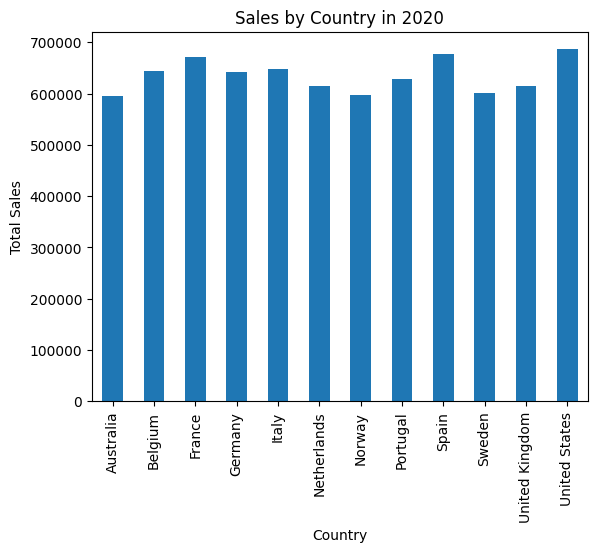

Sales by Country for 2021:
Country
Australia         696113.475695
Belgium           626729.389975
France            636659.709834
Germany           636923.220495
Italy             596719.132951
Netherlands       626741.688118
Norway            635106.922809
Portugal          646495.013298
Spain             610616.374559
Sweden            678552.283842
United Kingdom    703863.462789
United States     615351.792523
Name: TotalSales, dtype: float64


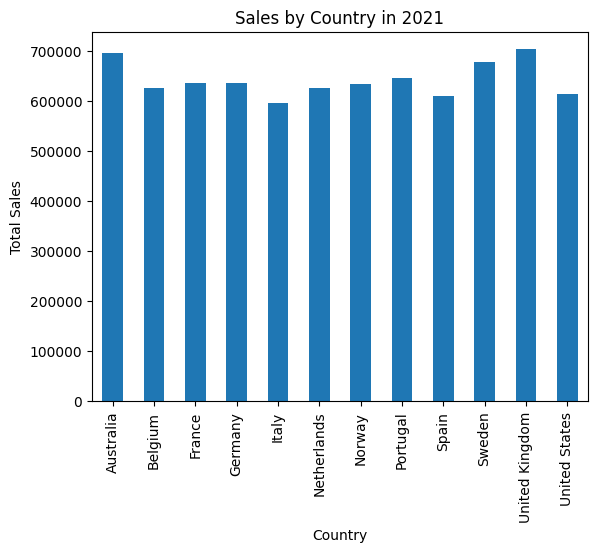

Sales by Country for 2022:
Country
Australia         584895.707836
Belgium           613667.390328
France            670981.496687
Germany           699256.332966
Italy             618608.109185
Netherlands       615923.882373
Norway            595484.591008
Portugal          641216.391563
Spain             598879.853067
Sweden            680910.268133
United Kingdom    638446.648215
United States     706567.859857
Name: TotalSales, dtype: float64


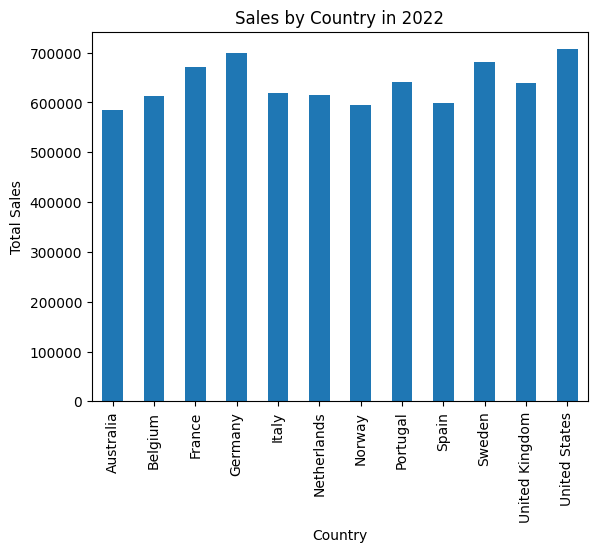

Sales by Country for 2023:
Country
Australia         659035.760244
Belgium           711689.746349
France            624917.001069
Germany           600830.179684
Italy             602151.130013
Netherlands       629138.773917
Norway            647306.567819
Portugal          603035.969128
Spain             579057.327333
Sweden            626931.332963
United Kingdom    651984.289544
United States     636268.127730
Name: TotalSales, dtype: float64


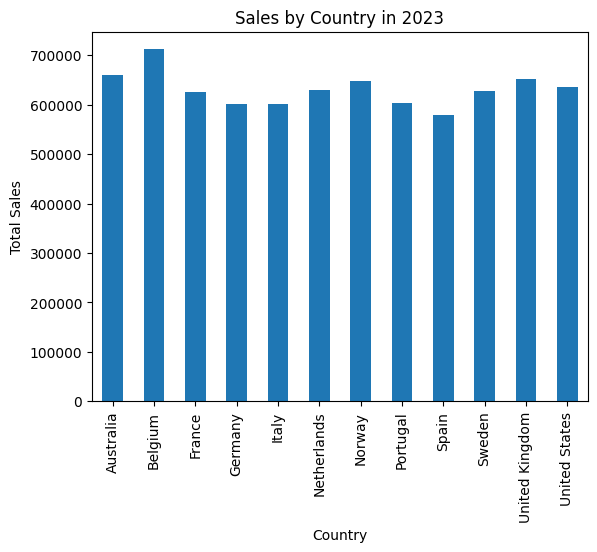

Sales by Country for 2024:
Country
Australia         605029.298288
Belgium           666838.216471
France            595684.352363
Germany           702298.763320
Italy             652714.422468
Netherlands       611521.656628
Norway            617015.312402
Portugal          673560.712301
Spain             695092.225478
Sweden            678891.415158
United Kingdom    616190.670691
United States     642257.213047
Name: TotalSales, dtype: float64


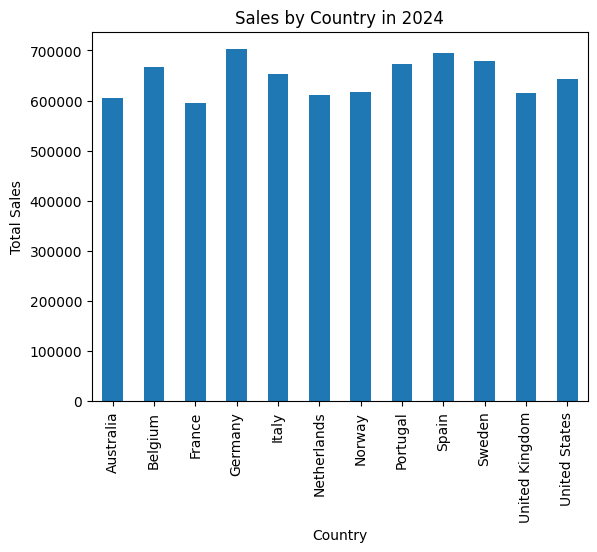

Sales by Country for 2025:
Country
Australia         358456.181190
Belgium           490130.070550
France            448864.793804
Germany           391149.683987
Italy             444895.532714
Netherlands       372413.714725
Norway            484841.017021
Portugal          417671.878777
Spain             451310.584014
Sweden            407394.358195
United Kingdom    489663.215456
United States     428672.223636
Name: TotalSales, dtype: float64


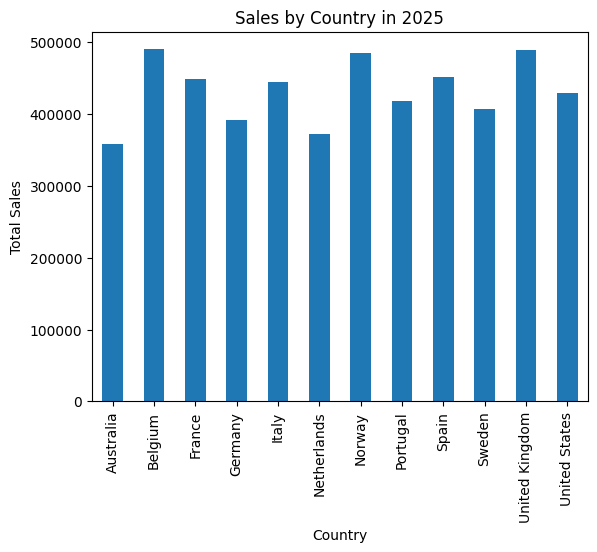

In [ ]:
#Geographical Sales Analysis
for year, data in data_by_year.items():
    country_sales = data.groupby('Country')['TotalSales'].sum()
    print(f"Sales by Country for {year}:")
    print(country_sales)

    # Plotting geographical sales
    country_sales.plot(kind='bar', title=f'Sales by Country in {year}')
    plt.xlabel('Country')
    plt.ylabel('Total Sales')
    plt.show()

By analyzing the given dataset, we gained valuable insights into product profitability by examining various dimensions of sales data. Our dataset comprised multiple columns, including product descriptions, unit prices, quantities sold, discounts, and shipping costs. By leveraging these metrics, we calculated each product's total sales and profits. The dataset comprises anonymized data on online sales transactions, capturing various aspects of product purchases, customer details, and order characteristics.  Sales Trends:



Monthly Sales for 2020: [Month
Jan 630703.010252
Feb 608863.278708
March 648736.022424
April 660908.151737
May 644803.553348
June 613828.830403
July 624132.099599
Aug 642348.786708
Sept 642788.463084
Oct 640867.527632
Nov 632877.939529
Dec 630908.259047]

Monthly Sales for 2021: [Month
Jan 676682.412194
Feb 587354.937763
March 652888.838266
April 637826.312613
May 656681.562110
June 639627.420381
July 627929.013168
Aug 627341.413019
Sept 673786.301887
Oct 641321.017677
Nov 623568.926868
Dec 664864.310941]

Monthly Sales for 2022: [Month
Jan 661525.894881
Feb 579115.735305
March 657063.986980
April 636828.675653
May 615659.138483
June 658976.651418
July 678116.692371
Aug 664836.191795
Sept 572748.672338
Oct 676098.144131
Nov 633540.484854
Dec 630328.263008]

Monthly Sales for 2023: [Month
Jan 641480.058695
Feb 570087.589139
March 645781.361819
April 619068.432268
May 629242.769450
June 595983.038148
July 621461.016976
Aug 620318.568726
Sept 630743.372961
Oct 667173.432112
Nov 656938.516435
Dec 674068.049064]

Monthly Sales for 2024: [Month
Jan 627778.896520
Feb 602332.221024
March 640498.867903
April 657351.801108
May 658197.521221
June 607222.831667
July 671598.312574
Aug 677339.845548
Sept 669969.861332
Oct 660350.737755
Nov 644207.316479
Dec 640246.045483]

Product Performance by Category:

Sales by Category for 2020: [Category
Accessories 1.44M
Apparel 1.56M
Electronics 1.47M
Furniture 1.49M
Stationery 1.63M
]

Sales by Category for 2021: [Category
Accessories 1.52M
Apparel 1.49M
Electronics 1.60M
Furniture 1.51M
Stationery 1.56M]

Sales by Category for 2022: [Category
Accessories 1.56M
Apparel 1.53M
Electronics 1.49M
Furniture 1.57M
Stationery 1.48M]

Sales by Category for 2023: [Category
Accessories 1.57M
Apparel 1.48M
Electronics 1.485M
Furniture 1.53M
Stationery 1.49M
]

Sales by Category for 2024: [Category
Accessories 1.58M
Apparel 1.56M
Electronics 1.52M
Furniture 1.57M
Stationery 1.50M]

Geographical Sales Analysis:

Sales by Country for 2020: [Country
Australia (594847.541650)
Belgium (643549.816327)
France (671483.112541)
Germany (641921.607459)
Italy (647810.387306)
Netherlands (614942.168316)
Norway (598218.109833)
Portugal (628856.263633)
Spain (678278.424274)
Sweden (600896.268383)
United Kingdom (614568.596707)
United States (686393.626042)
]

Sales by Country for 2021: [Country
Australia (696113.475695)
Belgium (626729.389975)
France (636659.709834)
Germany (636923.220495)
Italy (596719.132951)
Netherlands (626741.688118)
Norway (635106.922809)
Portugal (646495.013298)
Spain (610616.374559)
Sweden (678552.283842)
United Kingdom (703863.462789)
United States (615351.792523)
]

Sales by Country for 2022: [Country
Australia (584895.707836)
Belgium (613667.390328)
France (670981.496687)
Germany (699256.332966)
Italy (618608.109185)
Netherlands (615923.882373)
Norway (595484.591008)
Portugal (641216.391563)
Spain (598879.853067)
Sweden (680910.268133)
United Kingdom (638446.648215)
United States (706567.859857)
]

Sales by Country for 2023: [Country
Australia (659035.760244)
Belgium (711689.746349)
France (624917.001069)
Germany (600830.179684)
Italy (602151.130013)
Netherlands (629138.773917)
Norway (647306.567819)
Portugal (603035.969128)
Spain (579057.327333)
Sweden (626931.332963)
United Kingdom (651984.289544)
United States (636268.127730)
]

Sales by Country for 2024: [Country
Australia (605029.298288)
Belgium (666838.216471)
France (595684.352363)
Germany (702298.763320)
Italy (652714.422468)
Netherlands (611521.656628)
Norway (617015.312402)
Portugal (673560.712301)
Spain (695092.225478)
Sweden (678891.415158)
United Kingdom (616190.670691)
United States (642257.213047)
]